In [2]:
# The first part of the code checks if there is any duplicate id

import pandas as pd
df = pd.read_json('data/world_bank_projects.json')

# Each element of the _id column is a dictionary with the key '$oid'. 
# A list of the ids is created here
new_list = []
for i in range(len(df['_id'])):
    new_list.append(df['_id'][i]['$oid'])

# A Series is created from the list of ids
new_series = pd.Series(new_list, index=df.index)

# The id's are counted and the the top five ones are printed. If they have one more than one count of any, it means there are duplicate id's
print(new_series.value_counts().head())

52b213b38594d8a2be17c8ba    1
52b213b38594d8a2be17c8eb    1
52b213b38594d8a2be17c85e    1
52b213b38594d8a2be17c947    1
52b213b38594d8a2be17c805    1
dtype: int64


People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


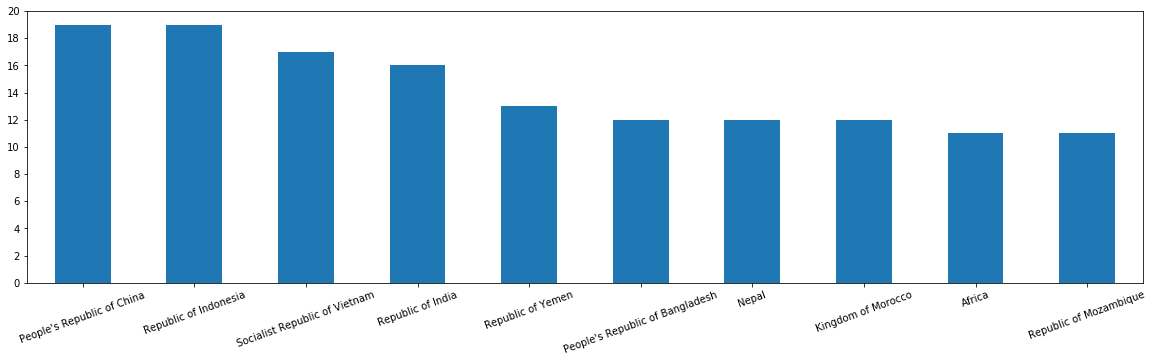

In [23]:
# QUESTION 1: The second part of the code fine the countries with the most number of project. Theese countries and the number of their projects are shown one plot
import matplotlib.pyplot as plt
import numpy as np

top_ten_countries = df.countryname.value_counts().head(10)
print(top_ten_countries)
plt.figure(figsize=(20,5))
top_ten_countries.plot(kind='bar')
plt.xticks(rotation = 20)
plt.yticks(np.arange(0, 21, step=2))
plt.show()

In [25]:
# QUESTIONS 2 & 3
#Q2: Find the top 10 major project themes (using column 'mjtheme_namecode')
#Q3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
# NOTE: Some entries of the column 'mjtheme_namecode' have more than one count of the same project theme. It is assumed all the occurences must be counted
# ...e.g. if some row has three project theme code 1 in the column 'mjtheme_namecode', three counts are added to the total number of occurences of the theme code 1
# NOTE: Since it's easier to state the major project themes based on the names and not the codes, and some names are missing, the code below
#...fills out the missing names first, and then finds the top 10 major project themes

In [26]:
# First, the number of unique codes across all the data frame is calculated. Each entry of the column 'mjtheme_namecode' is list of dictionary.
#... Each dictionary has two keys: code and name. As the results show below, there are eleven theme code in the data frame
set_code=set()
for i in df.index:
    for dictt in df.loc[i,'mjtheme_namecode']:
        set_code.add(dictt['code'])

set_code_length = len(set_code)
print(set_code_length)

11


In [27]:
# The next step is to create a dictionary which has the theme codes as keys and theme names as values by searching the data frame.
#...As soon as the dictionary is complete, the search stops 

index = 0
dict_code = dict()
while set_code_length > 0:
    for dictt in df.loc[index,'mjtheme_namecode']:
        if (dictt['name'] != '') and (dictt['code'] not in dict_code):
            dict_code[dictt['code']] = dictt['name']
            set_code_length -= 1
        index += 1

print(dict_code)

{'6': 'Social protection and risk management', '5': 'Trade and integration', '4': 'Financial and private sector development', '1': 'Economic management', '2': 'Public sector governance', '10': 'Rural development', '8': 'Human development', '7': 'Social dev/gender/inclusion', '11': 'Environment and natural resources management', '3': 'Rule of law', '9': 'Urban development'}


Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64


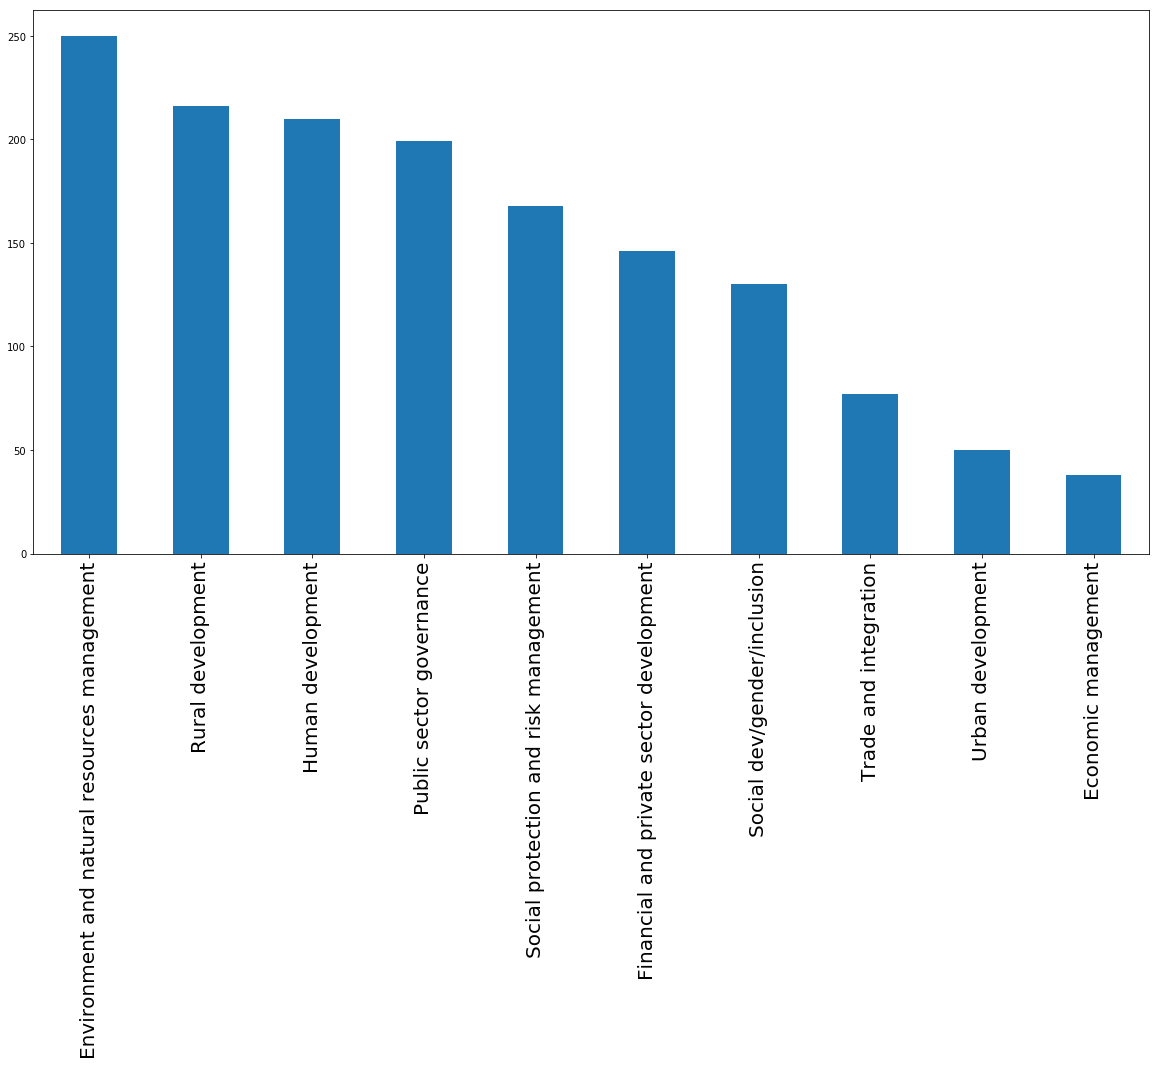

In [34]:
# Then the missing names are filled based on dict_code created above. A list of all occurences of each project theme is created as well
list_all = list()
for i in df.index:
    for dictt in df.loc[i,'mjtheme_namecode']:
        if dictt['name'] == '':
                dictt['name'] = dict_code[dictt['code']]
        list_all.append(dictt['name'])

# Finally a Series is created from the list created above and the the top 10 project themes are determined and plotted 
series = pd.Series(list_all)
top_ten_theme = series.value_counts().head(10)
print(top_ten_theme)
plt.figure(figsize=(20,10))
top_ten_theme.plot(kind='bar')
plt.xticks(size=20)
plt.show()